In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

%matplotlib inline

In [69]:
import pickle

goal_set = pickle.load(open('synthetic_dataset/goal_set.p', 'rb'))
slot_set = pickle.load(open('synthetic_dataset/slot_set.p', 'rb'))

In [75]:
train_data = goal_set['train']
test_data = goal_set['test']

data = train_data + test_data
data

[{'consult_id': 1059,
  'disease_tag': 'Central retinal artery or vein occlusion',
  'group_id': '7',
  'goal': {'request_slots': {'disease': 'UNK'},
   'explicit_inform_slots': {'Spots or clouds in vision': True},
   'implicit_inform_slots': {'Diminished vision': True,
    'Symptoms of eye': True,
    'Pain in eye': True}}},
 {'consult_id': 19510,
  'disease_tag': 'Degenerative disc disease',
  'group_id': '6',
  'goal': {'request_slots': {'disease': 'UNK'},
   'explicit_inform_slots': {'Shoulder pain': True},
   'implicit_inform_slots': {'Back pain': True,
    'Low back pain': True,
    'Neck pain': True,
    'Hip pain': True,
    'Ache all over': True}}},
 {'consult_id': 25630,
  'disease_tag': 'Diabetic retinopathy',
  'group_id': '4',
  'goal': {'request_slots': {'disease': 'UNK'},
   'explicit_inform_slots': {'Foreign body sensation in eye': True},
   'implicit_inform_slots': {}}},
 {'consult_id': 1467,
  'disease_tag': 'Chronic back pain',
  'group_id': '13',
  'goal': {'request

In [71]:
# 증상 집합 초기화
symptom_set = set()

# 각 데이터에서 증상 추출
for data in train_data:
    explicit_symptoms = data['goal']['explicit_inform_slots'].keys()
    implicit_symptoms = data['goal']['implicit_inform_slots'].keys()
    
    # 추출된 증상 집합에 추가
    symptom_set.update(explicit_symptoms)
    symptom_set.update(implicit_symptoms)

# 결과 출력
print("증상 집합:", symptom_set)

증상 집합: {'Chest tightness', 'Hip pain', 'Restlessness', 'Knee weakness', 'Throat swelling', 'Back stiffness or tightness', 'Lower body pain', 'Shoulder cramps or spasms', 'Disturbance of memory', 'Weakness', 'Swelling of scrotum', 'Infrequent menstruation', 'Foot or toe stiffness or tightness', 'Lacrimation', 'Pain or soreness of breast', 'Frontal headache', 'Excessive urination at night', 'Blindness', 'Ache all over', 'Hurts to breath', 'Sore throat', 'Insomnia', 'Seizures', 'Neck stiffness or tightness', 'Swollen tongue', 'Fluid retention', 'Decreased heart rate', 'Elbow cramps or spasms', 'Difficulty speaking', 'Skin growth', 'Temper problems', 'Itchy scalp', 'Abnormal appearing skin', 'Low self-esteem', 'Hand or finger cramps or spasms', 'Skin swelling', 'Premature ejaculation', 'Fluid in ear', 'Ear pain', 'Pain in eye', 'Anxiety and nervousness', 'Eye deviation', 'Chills', 'Symptoms of eye', 'Kidney mass', 'Shoulder swelling', 'Feeling cold', 'Bleeding or discharge from nipple', 'S

In [72]:
len(symptom_set)

266

In [83]:
# 증상과 질병을 속성으로 하는 데이터셋 생성
dataset = []

for item in data:

    disease = item.get('disease_tag', '')
    
    # 증상 유무를 나타내는 피처 초기화
    symptom_features = {symptom: 0 for symptom in symptom_set}
    
    # explicit 증상 업데이트
    for symptom in item['goal'].get('explicit_inform_slots', {}).keys():
        symptom_features[symptom] = 1
    
    # implicit 증상 업데이트
    for symptom in item['goal'].get('implicit_inform_slots', {}).keys():
        symptom_features[symptom] = 1
    
    # 데이터셋에 추가
    dataset.append({**{'disease': disease}, **symptom_features})

# 데이터프레임으로 변환
df = pd.DataFrame(dataset)

df

,disease,Chest tightness,Hip pain,Restlessness,Knee weakness,Throat swelling,Back stiffness or tightness,Lower body pain,Shoulder cramps or spasms,Disturbance of memory,...,Hand or finger stiffness or tightness,Increased heart rate,White discharge from eye,Scanty menstrual flow,Redness in ear,Double vision,Skin moles,Knee swelling,Nose deformity,Cough
0,Central retinal artery or vein occlusion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Degenerative disc disease,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Diabetic retinopathy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chronic back pain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Air embolism,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Conversion disorder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,Flat feet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,Alzheimer disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,Chronic back pain,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# 데이터셋 예시 (이미 생성한 데이터셋을 사용)
# df = pd.DataFrame(dataset)

# 질병을 제외한 특성 데이터 추출
X = df.drop('disease', axis=1)

# 질병 데이터 추출
y = df['disease']

# Information Gain 계산
info_gain = mutual_info_classif(X, y)

# 결과 출력
feature_info_gain = pd.Series(info_gain, index=X.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print(feature_info_gain)

Skin rash                                         0.248559
Pain in eye                                       0.218451
Back pain                                         0.184415
Diminished vision                                 0.180073
Depressive or psychotic symptoms                  0.175013
Wrist pain                                        0.165444
Headache                                          0.164377
Fever                                             0.152759
Skin lesion                                       0.152606
Sharp abdominal pain                              0.150429
Leg pain                                          0.148244
Anxiety and nervousness                           0.141724
Depression                                        0.140122
Fatigue                                           0.133407
Loss of sensation                                 0.133183
Pain or soreness of breast                        0.131366
Eye redness                                       0.1277

빈도가 낮게 나타나는 증상들은 정보력이 적어서 낮게나옴 
informaion gain을 고려하여 모델에 적용해보면 좋을듯 


결정트리

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 특성과 타겟 변수 분리
X = df.drop('disease', axis=1)
y = df['disease']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 학습
clf = DecisionTreeClassifier(random_state=42)  #max_depth
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.40%


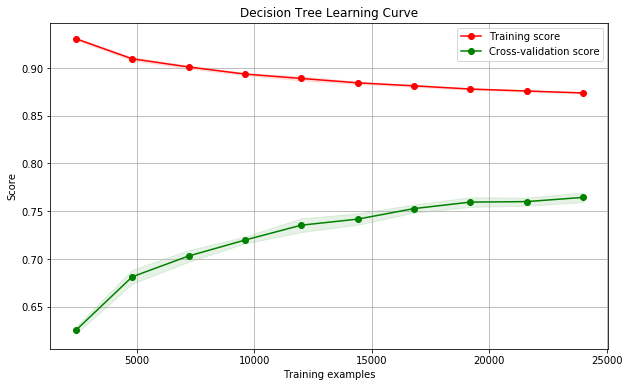

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 과적합 확인하기 위한
# 학습 곡선 함수 정의
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    plt.show()

# 결정 트리 모델로 학습 곡선 그리기
plot_learning_curve(clf, X, y, "Decision Tree Learning Curve")

decesion tree모델.
라이브러리 이용해서 학습해봤는데 tree깊이를 늘리면 정확도는 늘어나지만 과적합됨

In [126]:
# 예측 확률 계산
y_pred_proba = clf.predict_proba(X_test)

# 입력 'Spots or clouds in vision'에 대한 예측 확률
# 입력 데이터 생성
input_data = pd.DataFrame(0, index=range(1), columns=df.columns.drop('disease'))
input_data['Spots or clouds in vision'] = 1
input_proba = clf.predict_proba(input_data)

# 상위 5개 클래스 및 확률 출력
sorted_indices = input_proba.argsort()[0][::-1]

print("입력 'Spots or clouds in vision'에 대한 상위 5개 예측")
for i in range(5):
    class_label = clf.classes_[sorted_indices[i]]
    probability = input_proba[0, sorted_indices[i]]
    print(f"{i+1}등 - {class_label}: {probability}")

입력 'Spots or clouds in vision'에 대한 상위 5개 예측
1등 - Aphakia: 0.2727272727272727
2등 - Cystic Fibrosis: 0.22727272727272727
3등 - Acute glaucoma: 0.22727272727272727
4등 - Diabetic retinopathy: 0.18181818181818182
5등 - Central retinal artery or vein occlusion: 0.09090909090909091


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 전처리
X = df.drop('disease', axis=1)
y = df['disease']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 학습
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# 특성 중요도 확인
feature_importances = clf.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# 예측
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 특성 중요도 출력
print(important_features)

Accuracy: 75.25%
Skin rash                           5.851899e-02
Pain in eye                         4.906797e-02
Back pain                           3.929194e-02
Depressive or psychotic symptoms    3.607046e-02
Headache                            3.440570e-02
                                        ...     
Pain during intercourse             8.465393e-07
Symptoms of bladder                 0.000000e+00
Pus in urine                        0.000000e+00
Hysterical behavior                 0.000000e+00
Frequent menstruation               0.000000e+00
Length: 266, dtype: float64


In [129]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 특성과 타겟 변수 분리
X = df.drop('disease', axis=1)
y = df['disease']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y_train = le.fit_transform(y_train)


model = XGBClassifier(n_estimators=100, tree_method='hist',
                    max_depth=20, learning_rate=0.1, random_state=0)

model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%
